In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
pd.set_option('display.max_column',100)
pd.set_option('expand_frame_repr',False)

In [65]:
train_data=pd.read_csv(r'D:\文件\学习\数据集\titanic\train.csv')
test_data=pd.read_csv(r'D:\文件\学习\数据集\titanic\test.csv')

In [66]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [67]:
test_data.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [70]:
#删除无用字段
train_data=train_data.drop(["Name","Ticket","Cabin"],axis=1)
test_data=test_data.drop(["Name","Ticket","Cabin"],axis=1)

In [71]:
train=train_data.drop("Survived",axis=1)
label=train_data["Survived"]

In [72]:
train_sex=pd.get_dummies(train["Sex"],prefix="sex")
test_sex=pd.get_dummies(test_data["Sex"],prefix="sex")

In [73]:
train_data=pd.concat([train_data,train_sex],axis=1)
test_data=pd.concat([test_data,test_sex],axis=1)

In [74]:
train_Embarked=pd.get_dummies(train_data["Embarked"],prefix="Embarked")
test_Embarked=pd.get_dummies(test_data["Embarked"],prefix="Embarked")

In [75]:
train_data=pd.concat([train_data,train_Embarked],axis=1)
test_data=pd.concat([test_data,test_Embarked],axis=1)

In [76]:
train_data=train_data.drop("Survived",axis=1)

In [77]:
train_data=train_data.drop(["Embarked","Sex"],axis=1)
test_data=test_data.drop(["Embarked","Sex"],axis=1)

In [78]:
train_data.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.25,0,1,0,0,1


In [79]:
test_data.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0


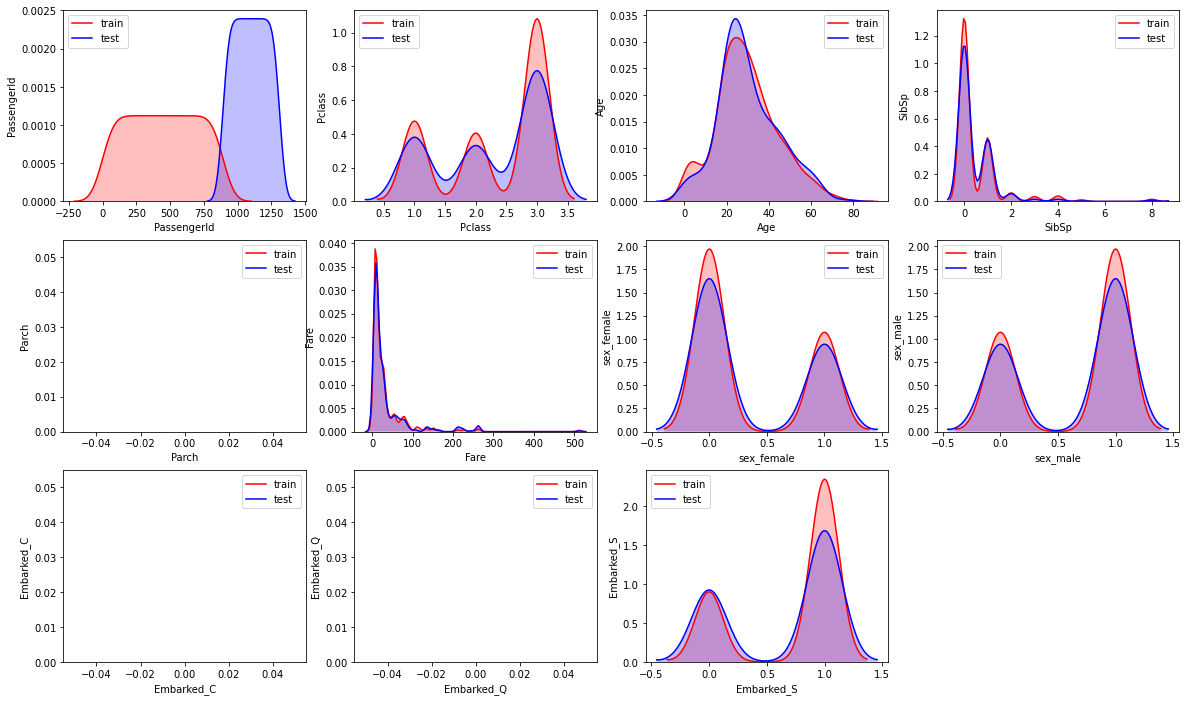

In [91]:
plt.figure(figsize=(20,12))
i=1
for col in train_data.columns:
    plt.subplot(3,4,i)
    ax=sns.kdeplot(train_data[col],color="Red",shade=True)
    ax=sns.kdeplot(test_data[col],color="Blue",shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel(col)
    ax=ax.legend(["train","test"])
    i=i+1
plt.show()


In [92]:
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636,0.636364,0.244019,0.110048,0.645933
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622,0.481622,0.430019,0.313324,0.478803
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000
